## Building load forecasting: Hospital in SF

We can train a forecaster on another commom energy problem. In this, case we are training a 1-step ahead forecaster to predict the electricity consumption of a building.

The dataset contains one year of hourly observations.
The training will occur on 11 months of the data, reserving the last month for evaluation.

In [4]:
# if 'google.colab' in str(get_ipython()):
#     !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
#     #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
# set_log_level("ERROR")

In [5]:
# # data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
# data_location = '../../../neuralprophet-data/datasets/'

# sf_load_df = pd.read_csv(data_location +  'energy/SF_hospital_load.csv')
sf_load_df = pd.read_csv('complete_dataset.csv', usecols=['date', 'demand'])
sf_load_df.rename(columns = {'date':'ds', 'demand':'y'}, inplace = True)

In [6]:
sf_load_df.head(3)

,ds,y
0,2015-01-01,99635.03
1,2015-01-02,129606.01
2,2015-01-03,142300.54


### Generic forecast: Time-based features only
In this first section, we will train a model with time-features only like we would do with Facebook Prophet.

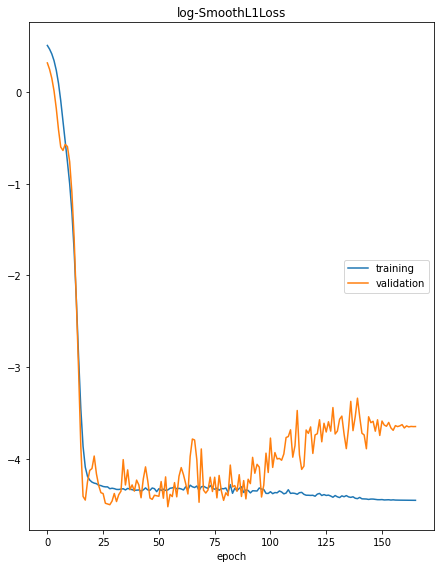

log-SmoothL1Loss
	training         	 (min:   -4.454, max:    0.509, cur:   -4.454)
	validation       	 (min:   -4.524, max:    0.319, cur:   -3.649)


In [7]:
m = NeuralProphet(
    weekly_seasonality=6,
    daily_seasonality=10,
    trend_reg=1,
    learning_rate=0.01,
)
df_train, df_test = m.split_df(sf_load_df, freq='D', valid_p = 1/5)

metrics = m.fit(df_train, freq='D', validation_df=df_test, progress='plot')

In [8]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
165,0.011635,6224.797393,8586.329629,0.007662,0.026023,10773.454102,13124.756836


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.941% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.941% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /Users/jenniferrodrigueztrujillo/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



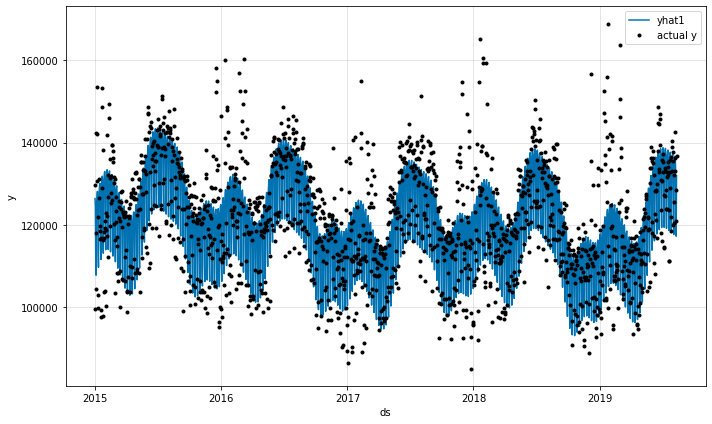

In [9]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.762% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.762% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


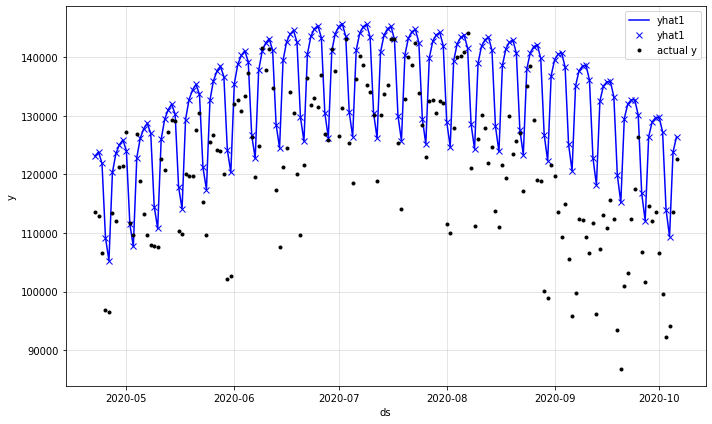

In [10]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

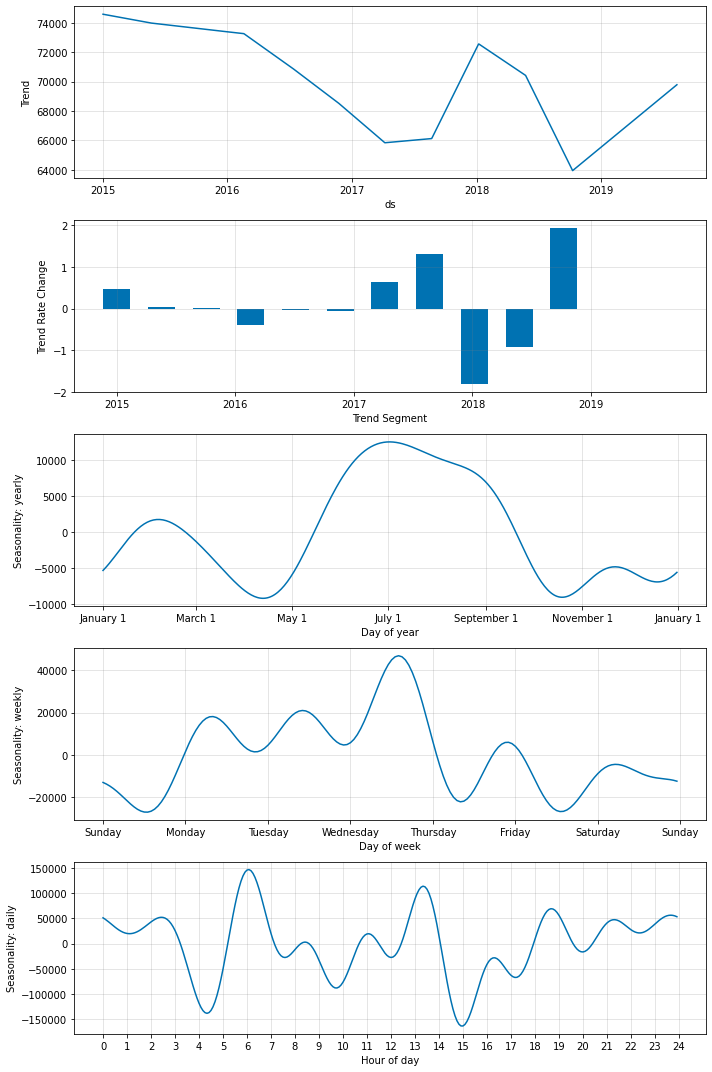

In [11]:
fig_param = m.plot_parameters()

## 1-step ahead forecast with Auto-Regression

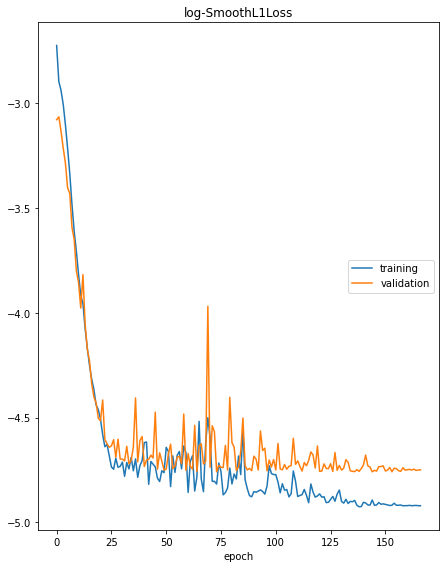

log-SmoothL1Loss
	training         	 (min:   -4.925, max:   -2.725, cur:   -4.921)
	validation       	 (min:   -4.759, max:   -3.066, cur:   -4.750)


In [12]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    ar_reg=1,
    learning_rate = 0.01,
)
df_train, df_test = m.split_df(sf_load_df, freq='D', valid_p = 1/5)

metrics = m.fit(df_train, freq='D', validation_df=df_test, progress='plot')

In [13]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
166,0.007295,5004.503252,6818.761649,0.001583,0.008654,5555.659668,7568.774902


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.941% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.941% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


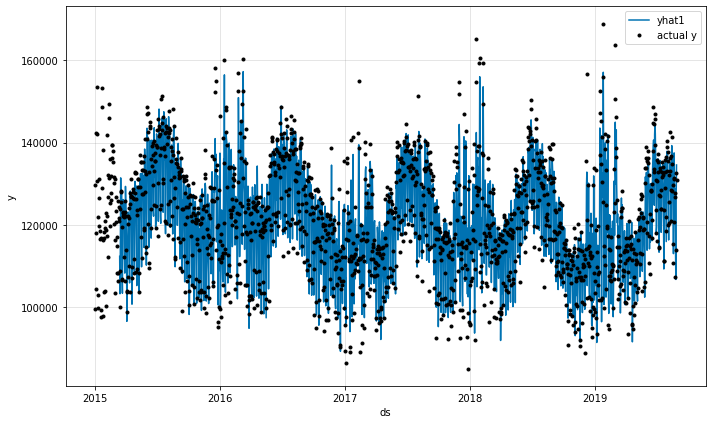

In [14]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.791% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.791% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


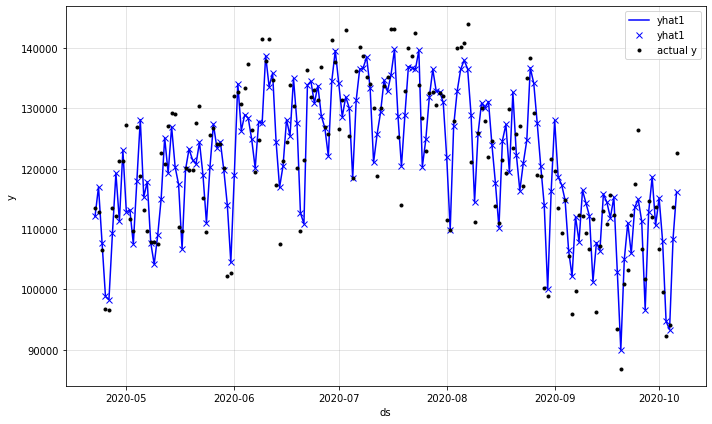

In [15]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

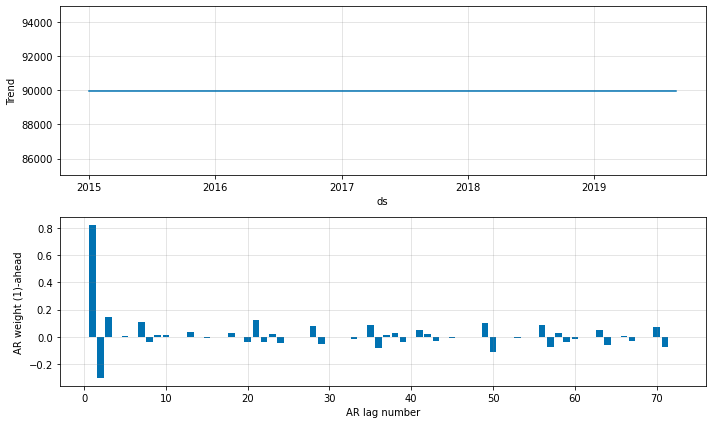

In [16]:
fig_param = m.plot_parameters()

## 1 step ahead forecast with AR-Net: Using a Neural Network
Here, we will use the power of a neural Network to fit non-linear patterns.

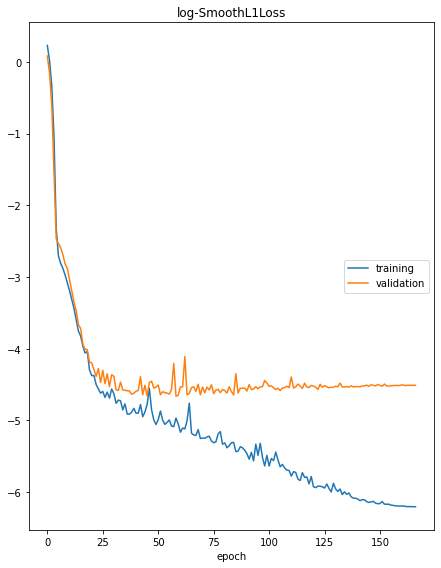

log-SmoothL1Loss
	training         	 (min:   -6.203, max:    0.230, cur:   -6.203)
	validation       	 (min:   -4.662, max:    0.082, cur:   -4.510)


In [19]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    num_hidden_layers=4,
    d_hidden=32,
    learning_rate=0.003,
)
df_train, df_test = m.split_df(sf_load_df, freq='D', valid_p = 1.0/5)

metrics = m.fit(df_train, freq='D', validation_df=df_test, progress='plot')

In [20]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
166,0.002024,2664.053629,3601.050061,0.0,0.010998,6233.509277,8532.375


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.941% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.941% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


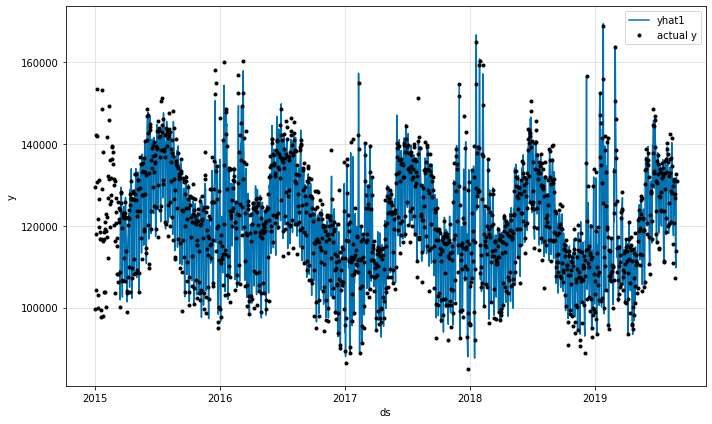

In [21]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.791% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.791% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


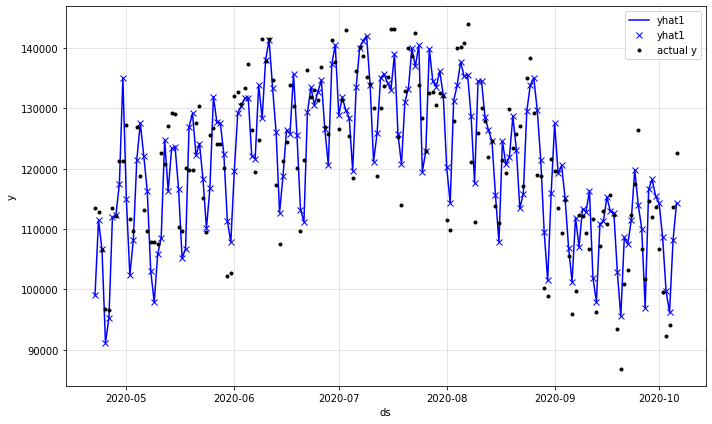

In [22]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

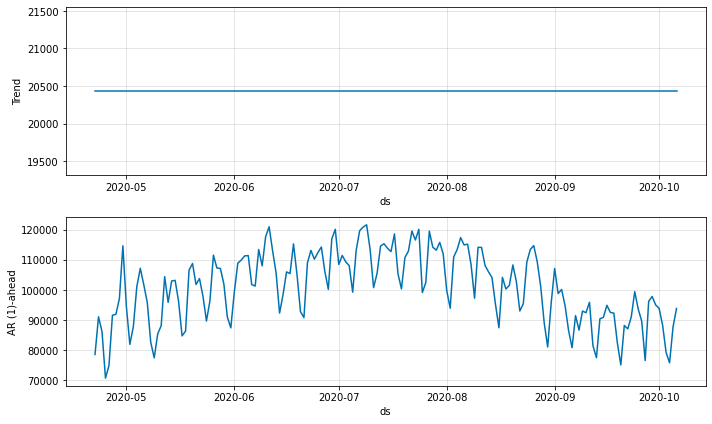

In [23]:
fig_comp = m.plot_components(forecast[-7*24:])